In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
%matplotlib inline
sns.set(style = 'darkgrid')
sns.set_palette('deep')

In [ ]:
# read the data
data = pd.read_csv('google_books_1299.csv')

In [ ]:
# check basic features and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1317 entries, 0 to 1316
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1299 non-null   float64
 1   title           1299 non-null   object 
 2   author          1299 non-null   object 
 3   rating          1224 non-null   float64
 4   voters          1224 non-null   float64
 5   price           1299 non-null   float64
 6   currency        1299 non-null   object 
 7   description     1296 non-null   object 
 8   publisher       1299 non-null   object 
 9   page_count      1299 non-null   float64
 10  generes         1299 non-null   object 
 11  ISBN            1299 non-null   object 
 12  language        1299 non-null   object 
 13  published_date  1299 non-null   object 
dtypes: float64(5), object(9)
memory usage: 144.2+ KB


In [ ]:
# check no. of records
len(data)

1317

In [ ]:
# check for duplicates
data.duplicated().any()

True

In [ ]:
data.dropna(inplace = True)
data.dtypes

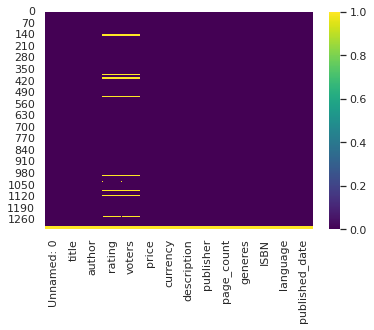

In [ ]:
sns.heatmap(data.isnull(), cmap='viridis')

Text(0, 0.5, 'Frequency')

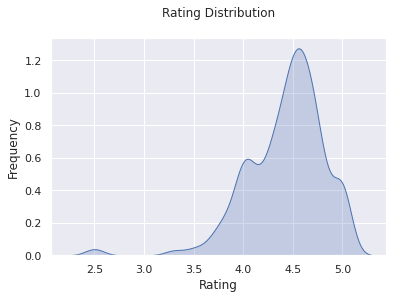

In [ ]:
# ratings distribution
sns.kdeplot(data['rating'], shade = True)
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Frequency')

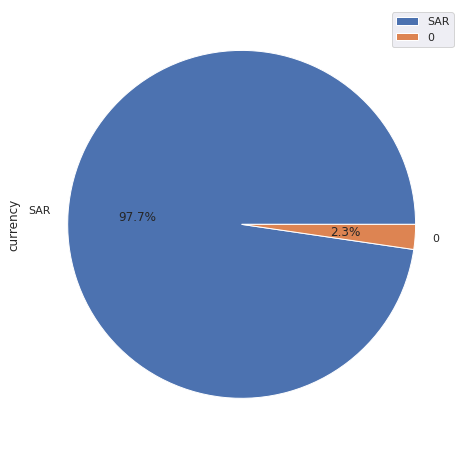

In [ ]:
# top currency
data['currency'].value_counts().head(5).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

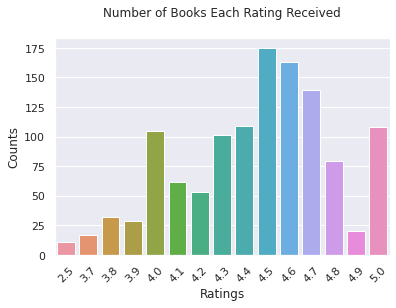

In [ ]:
# number of books per rating
sns.barplot(data['rating'].value_counts().head(15).index, data['rating'].value_counts().head(15))
plt.title('Number of Books Each Rating Received\n')
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.xticks(rotation=45)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


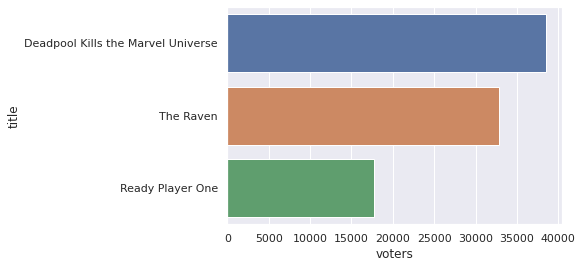

In [ ]:
# highest rated books
popular_books = data.nlargest(10, ['voters']).set_index('title')['voters']
sns.barplot(popular_books, popular_books.index)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000., 45000.]), <a list of 10 Text major ticklabel objects>)

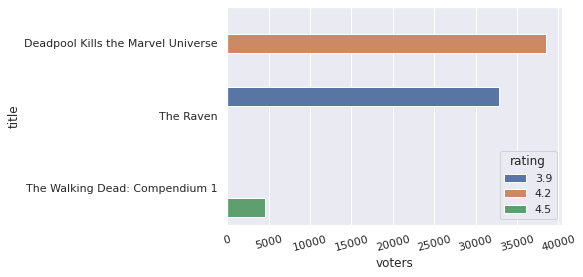

In [ ]:
# top 10 books under 200 pages for busy book lovers

under200 = data[data['page_count'] <= 200]
top10under200 = under200.nlargest(10, ['voters'])
sns.barplot(top10under200['voters'], top10under200['title'], hue=top10under200['rating'])
plt.xticks(rotation=15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


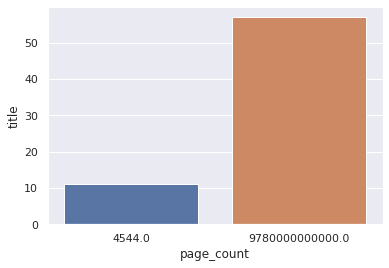

In [ ]:
# top 10 longest books
longest_books = data.nlargest( 10,['page_count']).set_index('title')
sns.barplot(longest_books['page_count'], longest_books.index)

(array([0]), <a list of 1 Text major ticklabel objects>)

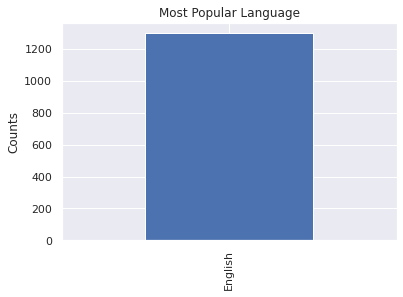

In [ ]:
# top languages
data['language'].value_counts().plot(kind='bar')
plt.title('Most Popular Language')
plt.ylabel('Counts')
plt.xticks(rotation = 90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Number of Publications')

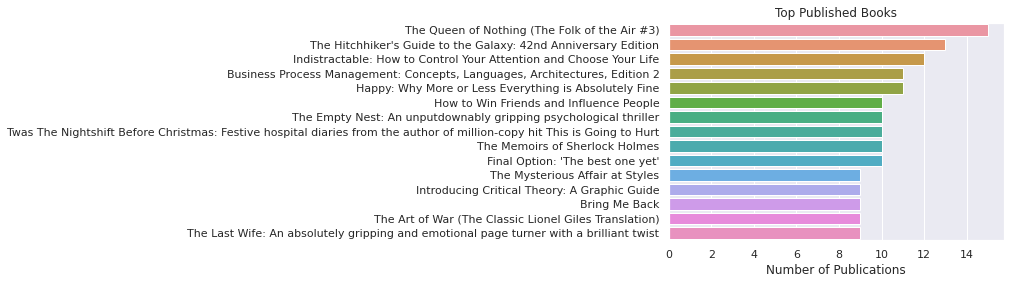

In [ ]:
# top published books
sns.barplot(data['title'].value_counts()[:15], data['title'].value_counts().index[:15])
plt.title('Top Published Books')
plt.xlabel('Number of Publications')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Total Ratings')

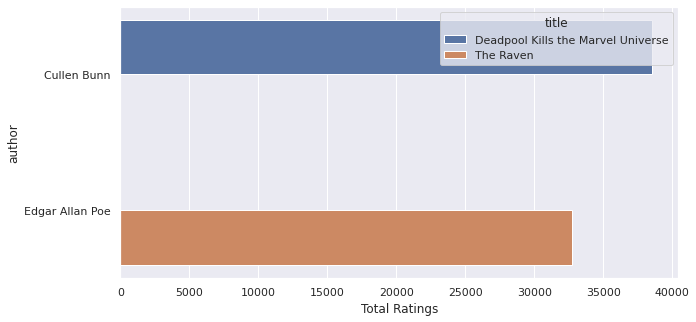

In [ ]:
# authors with highest rated books
plt.figure(figsize=(10, 5))
authors = data.nlargest(5, ['voters']).set_index('author')
sns.barplot(authors['voters'], authors.index, ci = None, hue = authors['title'])
plt.xlabel('Total Ratings')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'No. of Publications')

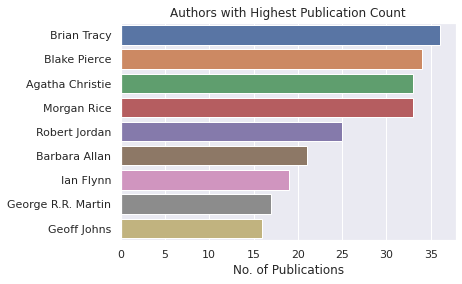

In [ ]:
# authors with highest publications
top_authors = data['author'].value_counts().head(9)
sns.barplot(top_authors, top_authors.index)
plt.title('Authors with Highest Publication Count')
plt.xlabel('No. of Publications')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'widely read generes')

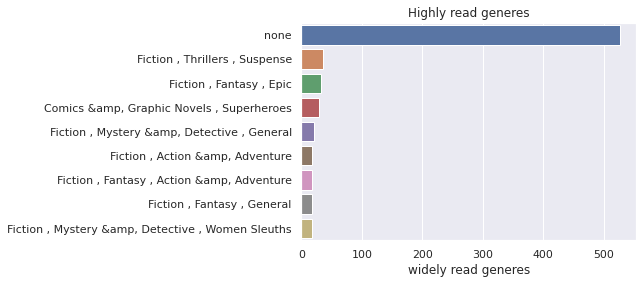

In [ ]:
top_authors = data['generes'].value_counts().head(9)
sns.barplot(top_authors, top_authors.index)
plt.title('Highly read generes')
plt.xlabel('widely read generes')

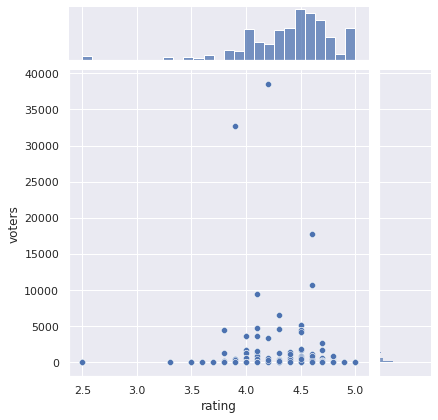

In [ ]:
# visualise a bivariate distribution between ratings & no. of reviews
sns.jointplot(x = 'rating', y = 'voters', data = data)

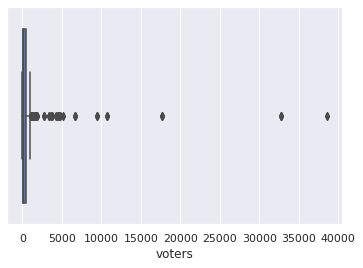

In [ ]:
# find no. of pages outliers
sns.boxplot(x=data['voters'])

In [ ]:
# remove outliers from no. of voters 
data = data.drop(data.index[data['voters'] >= 10000])

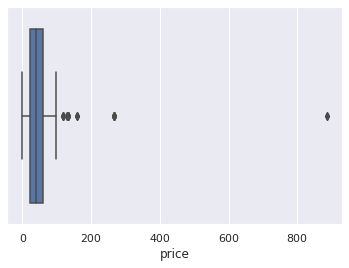

In [ ]:
# find price outliers
sns.boxplot(x=data['price'])

In [ ]:
# remove outliers from price
data = data.drop(data.index[data['price'] >= 200])

In [ ]:
# encode publisher column
le = preprocessing.LabelEncoder()
data['publisher'] = le.fit_transform(data['publisher'])

In [ ]:
# encode description column
le = preprocessing.LabelEncoder()
data['description'] = le.fit_transform(data['description'])

In [ ]:
# encode authors column
data['author'] = le.fit_transform(data['author'])

In [ ]:
# encode currency column
data['currency'] = le.fit_transform(data['currency'])

In [ ]:
# encode generes column
data['generes'] = le.fit_transform(data['generes'])

In [ ]:
# encode published column
data['published_date'] = le.fit_transform(data['published_date'])

In [ ]:
# encode title column
data['title'] = le.fit_transform(data['title'])

In [ ]:
# encode authors column
data['ISBN'] = le.fit_transform(data['ISBN'])

In [ ]:
# encode language column
data['language'] = le.fit_transform(data['language'])

In [ ]:

enc_lang = pd.get_dummies(data['language'])
data = pd.concat([data, enc_lang], axis = 1)

Removing unnecessary variable

In [ ]:
data.drop('English', inplace=True, axis=1)


Unnamed: 0     float64
title            int64
author           int64
rating         float64
voters         float64
price          float64
currency         int64
description      int64
publisher        int64
page_count     float64
generes          int64
dtype: object

In [ ]:
y = data['rating']
X = data.drop(['rating'], axis = 1)


In [ ]:
# split 80% of the data to the training set and 20% of the data to test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
predictions = lr.predict(X_test)

In [ ]:
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': predictions.tolist()}).head(25)
pred.head(10)

,Actual,Predicted
0,4.1,4.540442
1,4.9,4.428083
2,3.8,4.424476
3,4.7,4.463616
4,4.1,4.480424
5,4.7,4.484067
6,4.4,4.523694
7,4.3,4.471152
8,4.5,4.444926
9,4.2,4.519347


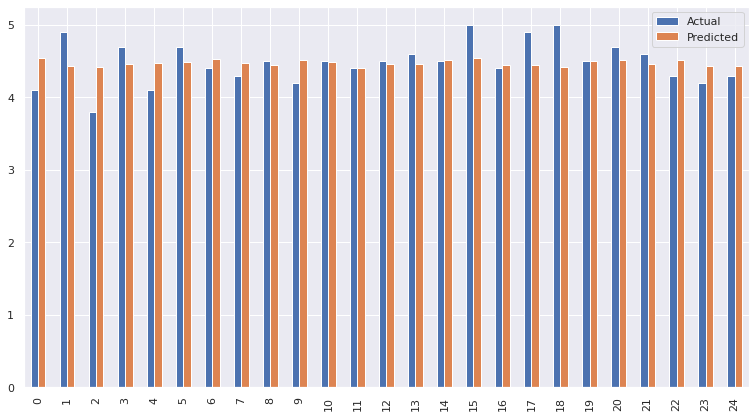

In [ ]:
# visualise the above comparison result
pred.plot(kind='bar', figsize=(13, 7))

In [ ]:
# evaluating the algorithm performance
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.2644088882976117
Mean Squared Error: 0.11383098896825124
Mean Squared Error: 0.3373884837516705
